## KNN (k-Nearest Neighbors)

In [1]:
from sklearn.neighbors import KNeighborsClassifier

### Exemplo: Cancer de mama

Numero de instâncias: 569  
Numero de atributos: 30


https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

**Importando o Dataset**

In [2]:
from sklearn.datasets import load_breast_cancer

**Dividindo entre treino e teste**

In [3]:
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

print(X_train.shape, y_train.shape)

(426, 30) (426,)


In [4]:
training_accuracy = []
test_accuracy = []

# número de vizinhos k de 1 à 10.
neighbors_settings = range(1, 11)

**Criando e testando o modelo**

In [5]:
for n_neighbors in neighbors_settings:
    # Construindo o modelo
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # gravando a acurácia de treino
    training_accuracy.append(clf.score(X_train, y_train))
    
    # gravando a acurácia de teste
    test_accuracy.append(clf.score(X_test, y_test))

**Plotando**

In [6]:
import matplotlib.pyplot as plt

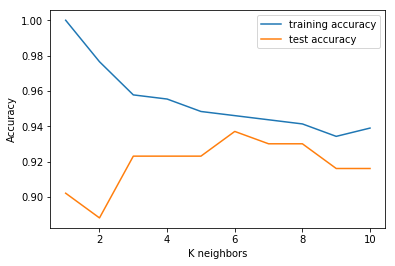

In [7]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K neighbors")
plt.legend();

Podemos ver no gráfico acima que se utilizássemos apenas um vizinho, teríamos um caso de overfit, onde a acurácia do treino fica em 100%, enquanto que a acurácia do teste atinge apenas 90%.  
A medida que vamos aumentando a quantidade de vizinhos, a acurácia do treino vai caindo, porém a acurácia do teste vai subindo, chegando a um valor ótimo com k=6. A partir desse valor tanto a acurácia de treino quanto a de teste caem, o que nos mostra que  a acurácia não necessariamente será melhor à medida que aumentamos quantidade de vizinhos.  
Para acharmos um bom valor de k, devemos testar vários valores.